# Importing neccessary libraries

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

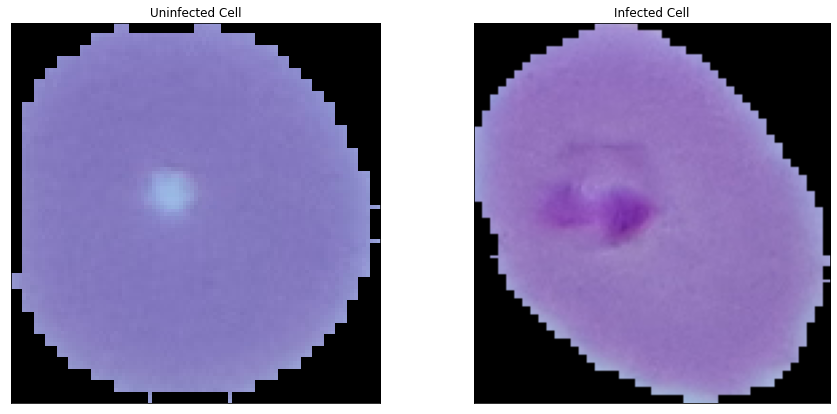

In [24]:
import cv2

upic='D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/cell_image_focus/1_Uninfected/C57P18thinF_IMG_20150729_104027_cell_92.png'
apic='D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/cell_image_focus/2_Parasitized/C59P20thinF_IMG_20150803_112802_cell_170.png'
#D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/cell_image_focus
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [25]:
width = 128
height = 128

In [26]:
seed_value = 1000
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Dividing Dataset into two folders train and test

In [27]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [28]:
trainDatagen = datagen.flow_from_directory(directory='D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/cell_image_focus/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 10,
                                           seed=seed_value,
                                           subset='training')

Found 1600 images belonging to 2 classes.


In [29]:
#X_train, y_train = next(trainDatagen)

In [30]:
valDatagen = datagen.flow_from_directory(directory='D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/cell_image_focus/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 400,
                                           seed=seed_value,
                                           subset='validation', shuffle=False)

Found 400 images belonging to 2 classes.


In [31]:
y_train = trainDatagen.classes
X_train = trainDatagen.filenames

In [32]:
y_val = valDatagen.classes
X_val = valDatagen.filenames

In [33]:
X_val = valDatagen.next()[0]

In [34]:
X_val.shape

(400, 128, 128, 3)

In [35]:
num_val_samples = len(valDatagen)
X_val = []
for i in range(num_val_samples):
    batch_x = valDatagen.next()[0]
    X_val.append(batch_x)

In [36]:
X_val = np.concatenate(X_val)

In [37]:
print(trainDatagen.class_indices)
print(valDatagen.class_indices)

{'1_Uninfected': 0, '2_Parasitized': 1}
{'1_Uninfected': 0, '2_Parasitized': 1}


# Preparing the model

In [64]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(20,(2,2),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(20,(2,2),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.1))

model.add(Conv2D(20,(2,2),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 127, 127, 20)      260       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 42, 42, 20)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 42, 42, 20)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 41, 41, 20)        1620      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 20)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 20)       

In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2,min_delta=0.001)

In [62]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =50,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/50


<ipython-input-62-b99cfa0f9306>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


160/160 [==============================] - 5s 29ms/step - loss: 0.6943 - accuracy: 0.5356 - val_loss: 0.6754 - val_accuracy: 0.5575
Epoch 2/50
160/160 [==============================] - 4s 25ms/step - loss: 0.6266 - accuracy: 0.6612 - val_loss: 0.6505 - val_accuracy: 0.5675
Epoch 3/50
160/160 [==============================] - 4s 25ms/step - loss: 0.5819 - accuracy: 0.6850 - val_loss: 0.7159 - val_accuracy: 0.5550
Epoch 4/50
160/160 [==============================] - 4s 26ms/step - loss: 0.5796 - accuracy: 0.6850 - val_loss: 0.6087 - val_accuracy: 0.6700
Epoch 5/50
160/160 [==============================] - 4s 27ms/step - loss: 0.5649 - accuracy: 0.6900 - val_loss: 0.6489 - val_accuracy: 0.6050
Epoch 6/50
160/160 [==============================] - 4s 26ms/step - loss: 0.5463 - accuracy: 0.7025 - val_loss: 0.5962 - val_accuracy: 0.6400
Epoch 7/50
160/160 [==============================] - 4s 27ms/step - loss: 0.5155 - accuracy: 0.7400 - val_loss: 0.5029 - val_accuracy: 0.7775
Epoch 8/50

# Plot

In [45]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

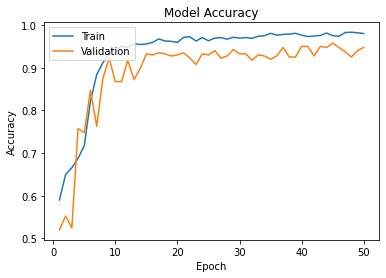

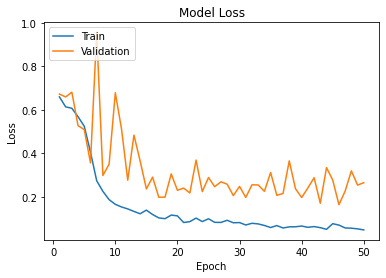

In [46]:
plotLearningCurve(history,50)

In [47]:
history.history

{'loss': [0.6596949100494385,
  0.6138970851898193,
  0.6073862910270691,
  0.5686778426170349,
  0.5246331095695496,
  0.4062331020832062,
  0.27468863129615784,
  0.22578126192092896,
  0.1878371238708496,
  0.16631512343883514,
  0.15424323081970215,
  0.14523440599441528,
  0.13379016518592834,
  0.12293723225593567,
  0.13974320888519287,
  0.11955485492944717,
  0.10399876534938812,
  0.10046084225177765,
  0.11690547317266464,
  0.11333302408456802,
  0.08278823643922806,
  0.08686366677284241,
  0.1031656265258789,
  0.08711382001638412,
  0.10008908063173294,
  0.08362483978271484,
  0.0832364559173584,
  0.09299742430448532,
  0.08165591210126877,
  0.08251377940177917,
  0.07148896902799606,
  0.0792718380689621,
  0.07644081860780716,
  0.06923704594373703,
  0.0598117858171463,
  0.06870780885219574,
  0.05777977406978607,
  0.0628274604678154,
  0.06329524517059326,
  0.06660637259483337,
  0.06083148345351219,
  0.06420303136110306,
  0.059236202389001846,
  0.0515746325

# Hasil Evaluasi

In [48]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2656601071357727
Test accuracy: 0.9474999904632568


In [49]:
from sklearn.metrics import classification_report

In [50]:
y_pred = model.predict(X_val)

13/13 [==============================] - 0s 14ms/step


In [51]:
#y_pred = model.predict_generator(valDatagen, steps=len(valDatagen))

In [52]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [53]:
y_true = valDatagen.classes

In [54]:
cm = confusion_matrix(y_true, y_pred_labels)

In [56]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[198   2]
 [ 19 181]]


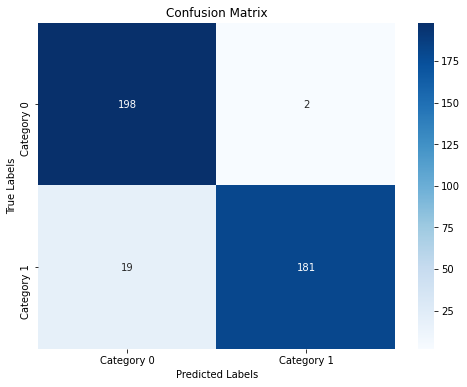

In [57]:
class_labels = ["Category 0", "Category 1"]

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [281]:
print(classification_report(y_true, y_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       200
           1       0.83      0.88      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



# Simpan Model

In [28]:
# Save the CNN model architecture to JSON format
model_json = model.to_json()
with open('my_model80.json', 'w') as json_file:
    json_file.write(model_json)

# Save the CNN model weights to H5 format
model.save_weights('my_model80.h5')

NameError: name 'model' is not defined

# Load Model

In [17]:
# Load the CNN model from JSON and H5 files
from keras.models import model_from_json
with open('my_model80.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('my_model80.h5')

# Test Image (Validation)

In [5]:
import matplotlib.pyplot as plt

In [19]:
X_val

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [6]:
image_path = "D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/Data_Validasi/MALARIA_01.png"

In [7]:
image = cv2.imread(image_path)

In [8]:
target_size = (128, 128)

In [9]:
image_resized = cv2.resize(image, target_size)

In [10]:
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

In [11]:
#cv2.imshow('Resized Image', image_rgb)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [12]:
image_array = np.array(image_rgb)

In [13]:
image_array_normalized = image_array / 255.0

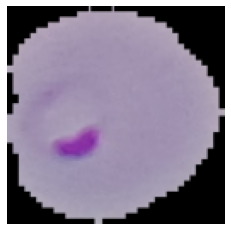

In [14]:
plt.imshow(image_array_normalized)
plt.axis('off')
plt.show()

In [15]:
input_data = np.expand_dims(image_array_normalized, axis=0)

# Test Data (Quick Output)

In [16]:
predictions = loaded_model.predict(input_data)

1/1 [==============================] - 0s 217ms/step


In [17]:
predicted_class = (predictions[0] > 0.5).astype(int)

In [18]:
predictions

array([[0.9999909]], dtype=float32)

In [895]:
print("Predicted Class:", predicted_class)

Predicted Class: [0]


# Output Image Excel (RGB)

In [896]:
image_red = image_array_normalized[:, :,0]
df_image_red = pd.DataFrame(image_red)
excel_file_path_red = 'D:/Kuliah/Kulon/Skripsi/Manual_satu_gambar/output_gambar_red.xlsx'
df_image_red.to_excel(excel_file_path_red, index=False)

In [95]:
image_green = image_array_normalized[:, :,1]
df_image_green = pd.DataFrame(image_green)
excel_file_path_green = 'D:/Kuliah/Kulon/Skripsi/Manual_satu_gambar/output_gambar_green.xlsx'
df_image_green.to_excel(excel_file_path_green, index=False)

In [96]:
image_blue = image_array_normalized[:, :,2]
df_image_blue = pd.DataFrame(image_blue)
excel_file_path_blue = 'D:/Kuliah/Kulon/Skripsi/Manual_satu_gambar/output_gambar_blue.xlsx'
df_image_blue.to_excel(excel_file_path_blue, index=False)

# ISI MATRIX

## cara 1

In [22]:
layers = loaded_model.layers

In [23]:
for layer in layers:
    if hasattr(layer, 'get_weights'):
        weights = layer.get_weights()
        if weights:
            print(f"Layer: {layer.name}")
            print(f"Weights: {weights}")

Layer: conv2d_45
Weights: [array([[[[ 0.00241494, -0.33376047,  0.00708213,  0.04151908,
          -0.2082778 ,  0.06069809,  0.10604341, -0.17735328,
           0.199866  ,  0.11462559, -0.23491205, -0.00502152,
          -0.19327404,  0.17512213,  0.18289907, -0.13341762,
           0.3061296 ,  0.21228428, -0.08672662,  0.04981778],
         [-0.08019362, -0.24324948, -0.03015869,  0.24236645,
           0.16163933,  0.26371127, -0.27747732, -0.2365903 ,
          -0.06421176,  0.26005104,  0.09469187,  0.01802749,
           0.2360058 ,  0.06190369,  0.14522547,  0.11858084,
          -0.02617671, -0.01501826,  0.01806279, -0.15188515],
         [ 0.02558526,  0.04798944, -0.21855488, -0.0079316 ,
           0.14820303,  0.15310274,  0.23907284, -0.16499673,
           0.03688512, -0.24114655, -0.35157225,  0.18714488,
           0.21487257,  0.01753503, -0.21430296, -0.14862227,
           0.12318052,  0.20099626,  0.12049836, -0.03637303]],

        [[ 0.07837544,  0.4183017 , -0

# cara 2

In [19]:
import keras
from keras.models import load_model

In [109]:
layer_name = 'dense_34'  # Replace with the name of your desired layer

## LAYER OUTPUT

In [110]:
# Function to get the output of a specific layer for a given input
def get_layer_output(model, layer_name, input_data):
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    layer_output = intermediate_layer_model.predict(input_data)
    return layer_output

In [111]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf, formatter={'float_kind':lambda x: "{:.9f}".format(x).rstrip('0').rstrip('.') if abs(x) > 1e-10 else "{:.9f}".format(x).replace('0.', '.').replace('-0.', '-.'), 'floatmode': 'fixed', 'use_sign_for_zero': False})
# Example: Get output of a specific layer (replace 'layer_name' with the desired layer's name)

output_of_layer = get_layer_output(loaded_model, layer_name, input_data)

print(f"Output of layer '{layer_name}':")
print(output_of_layer)

1/1 [==============================] - 0s 56ms/step
Output of layer 'dense_34':
[[2.649657726 .000000000 .000000000 .000000000 .000000000 2.129709959 .000000000 2.359751701 .000000000 .000000000 3.191286087 .000000000 .000000000 .000000000 0.346535742 1.98063457 .000000000 1.539793968 1.60518682 0.014199968 .000000000 .000000000 .000000000 .000000000 0.909790754 .000000000 0.864652216 .000000000 1.853821754 .000000000 .000000000 .000000000 2.428209782 .000000000 .000000000 0.710073709 .000000000 1.581228614 2.745054007 .000000000 .000000000 .000000000 .000000000 1.535180211 .000000000 0.766359091 .000000000 .000000000 0.842542052 .000000000 0.339853793 .000000000 .000000000 .000000000 1.540700316 2.828660965 1.195731163 .000000000 .000000000 0.272363394 .000000000 .000000000 2.566306114 .000000000 .000000000 .000000000 .000000000 0.94248575 .000000000 .000000000 2.607835531 .000000000 3.463220835 .000000000 .000000000 .000000000 .000000000 0.214134142 0.875348151 0.707793534 .000000000

In [100]:
output_of_layer.shape

(1, 320)

##### EXPORT

In [101]:
data_array_2d = output_of_layer.reshape(-1, output_of_layer.shape[-1])#tulisan output diganti sama apa yang mau diganti jadi 2D arraynya
df = pd.DataFrame(data_array_2d)

In [102]:
excel_file_path = 'D:/Kuliah/Kulon/Skripsi/Manual_satu_gambar/Output_flatten_fixxx.xlsx'

In [103]:
df.to_excel(excel_file_path, index=False)

## LAYER WEIGHT

In [112]:
# Access the weights of the specified layer
layer_weights = loaded_model.get_layer(layer_name).get_weights()

In [113]:
layer_weights

[array([[-0.003561773, -0.127119958, -0.084924899, 0.008795038, -0.098874629, 0.139717951, -0.10578806, 0.073889315, -0.090304673, 0.107262954, -0.025787978, -0.052350335, 0.101357177, -0.170997038, 0.120106101, 0.066044815, -0.108776115, 0.035592604, 0.230540544, -0.06995327, 0.145268738, -0.065887988, -0.090812087, -0.040047072, -0.032870874, -0.01266187, -0.047717463, 0.072839476, 0.112323269, -0.139703974, 0.056508448, 0.002608475, 0.048447751, -0.073738888, -0.085373409, -0.104148887, 0.071729004, -0.019598413, 0.057928074, -0.088648193, -0.06926661, -0.086652286, -0.11035876, 0.127443641, 0.144196495, 0.03845764, -0.098321944, 0.096485421, -0.024302386, -0.014484042, 0.107465409, 0.09081798, -0.091429152, -0.03147576, 0.024764095, 0.202218592, 0.093982108, -0.054908752, -0.016820276, 0.076299571, -0.055109873, -0.11956045, 0.160778597, 0.026352422, 0.11574807, 0.036616374, -0.11970672, -0.037837416, -0.148506716, -0.076392092, 0.150632739, 0.01132582, -0.025399452, -0.134128153, 

In [82]:
print(f"Weights of layer '{layer_name}':")
for weight in layer_weights:
    print(weight.shape)

Weights of layer 'dense_34':
(320, 128)
(128,)


##### EXPORT

In [83]:
df_weight = pd.DataFrame(layer_weights,dtype=object)

In [84]:
excel_file_path_weight = 'D:/Kuliah/Kulon/Skripsi/Manual_satu_gambar/bobot_dense1_fixxx.xlsx'

In [85]:
df_weight.to_excel(excel_file_path_weight, index=False)

##### EXPORT

array([[-0.00356177, -0.12711996, -0.0849249 , ..., -0.02654037,
        -0.01444716,  0.06026015],
       [-0.04093301,  0.01093191, -0.08439025, ..., -0.01460231,
         0.04343395,  0.11066675],
       [ 0.14579691, -0.0584504 , -0.16385442, ...,  0.14869843,
        -0.00729526,  0.11955783],
       ...,
       [ 0.0779925 ,  0.01137978,  0.05281866, ..., -0.01254489,
        -0.06636354, -0.04485181],
       [-0.01934686,  0.07568752,  0.00209272, ..., -0.11556984,
         0.01324291, -0.09706363],
       [-0.02493709,  0.12767884, -0.03254354, ...,  0.03530235,
        -0.00688139,  0.10102932]], dtype=float32)

 # TEST DATA

In [58]:
from tensorflow import keras
import numpy as np

In [46]:
loaded_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
loss, accuracy = loaded_model.evaluate(X_val, y_val)

13/13 [==============================] - 1s 33ms/step - loss: 0.2429 - accuracy: 0.9550


In [56]:
predicted_probabilities = loaded_model.predict(X_val)

# Calculate the loss for each sample
sample_losses = []

13/13 [==============================] - 0s 22ms/step - loss: 0.2429 - accuracy: 0.9550


In [53]:
predicted_probabilities

array([[7.45370585e-07],
       [2.56087947e-06],
       [1.61602092e-08],
       [7.75740657e-04],
       [8.10064265e-08],
       [8.87825809e-05],
       [4.97809332e-08],
       [4.83539712e-04],
       [8.39598755e-08],
       [4.25490798e-05],
       [3.02209742e-08],
       [1.57511222e-05],
       [8.39838989e-08],
       [5.33720126e-08],
       [1.93928845e-05],
       [1.54412447e-07],
       [5.73343365e-04],
       [2.96885645e-07],
       [2.47669159e-05],
       [6.52043382e-05],
       [1.08439781e-06],
       [2.36751969e-08],
       [1.03437264e-06],
       [1.08983695e-05],
       [5.51194944e-07],
       [2.40939767e-06],
       [2.22019665e-03],
       [1.08401378e-04],
       [3.72326070e-07],
       [7.13077526e-08],
       [5.51050974e-08],
       [6.44400188e-06],
       [7.68602945e-07],
       [1.30391552e-03],
       [1.01478925e-07],
       [3.03141169e-05],
       [1.34046268e-05],
       [1.51812405e-04],
       [6.32262186e-07],
       [3.70900198e-05],


In [55]:
losses

[0.2429216504096985, 0.9549999833106995]

In [92]:
sample_losses = []
sample_losses_formatted = []

In [115]:
# Iterate through the testing data and calculate losses
for i in range(len(X_val)):
    print(f"Sample {i + 1}:")
    
    # Get the true label and predicted probabilities for this sample
    true_label = y_val[i]
    predicted_probs = predicted_probabilities[i]
    
    # Calculate the categorical cross-entropy loss for this sample
    sample_loss = -np.sum(true_label * np.log(predicted_probs) + (1 - true_label) * np.log(1 - predicted_probs))
    
    sample_losses.append(sample_loss)
    
    formatted_loss = f"{sample_loss:.8f}"
    sample_losses_formatted.append(formatted_loss)
    
    # Append the loss to the list of sample losses
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {(predicted_probs > 0.5).astype(int)}") 
    print("Predicted Probabilities:")
    for class_index, prob in enumerate(predicted_probs):
        print(f"Probability {prob:.8f}")
    print(f"Loss: {sample_loss:.8f}")
    print("-" * 30)

Sample 1:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00000075
Loss: 0.00000077
------------------------------
Sample 2:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00000256
Loss: 0.00000256
------------------------------
Sample 3:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00000002
Loss: -0.00000000
------------------------------
Sample 4:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00077574
Loss: 0.00077606
------------------------------
Sample 5:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00000008
Loss: 0.00000006
------------------------------
Sample 6:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00008878
Loss: 0.00008881
------------------------------
Sample 7:
True Label: 0
Predicted Label: [0]
Predicted Probabilities:
Probability 0.00000005
Loss: 0.00000006
------------------------------
Sample 8:
Tr

Predicted Probabilities:
Probability 0.99491888
Loss: 0.00509407
------------------------------
Sample 321:
True Label: 1
Predicted Label: [1]
Predicted Probabilities:
Probability 0.99998897
Loss: 0.00001103
------------------------------
Sample 322:
True Label: 1
Predicted Label: [1]
Predicted Probabilities:
Probability 0.99995393
Loss: 0.00004608
------------------------------
Sample 323:
True Label: 1
Predicted Label: [1]
Predicted Probabilities:
Probability 0.93888885
Loss: 0.06305818
------------------------------
Sample 324:
True Label: 1
Predicted Label: [1]
Predicted Probabilities:
Probability 0.99999136
Loss: 0.00000864
------------------------------
Sample 325:
True Label: 1
Predicted Label: [1]
Predicted Probabilities:
Probability 0.99921995
Loss: 0.00078035
------------------------------
Sample 326:
True Label: 1
Predicted Label: [1]
Predicted Probabilities:
Probability 0.99956137
Loss: 0.00043873
------------------------------
Sample 327:
True Label: 1
Predicted Label: [1]

<ipython-input-115-e0f7fffac865>:10: RuntimeWarning: divide by zero encountered in log
  sample_loss = -np.sum(true_label * np.log(predicted_probs) + (1 - true_label) * np.log(1 - predicted_probs))
<ipython-input-115-e0f7fffac865>:10: RuntimeWarning: invalid value encountered in multiply
  sample_loss = -np.sum(true_label * np.log(predicted_probs) + (1 - true_label) * np.log(1 - predicted_probs))


# FAIL

In [105]:
total_loss = np.sum([float(loss) for loss in sample_losses_formatted])
print(f"Total Loss on testing data: {total_loss:.8f}")

Total Loss on testing data: 291.50597690


In [95]:
sample_losses_formatted

['0.00000077',
 '0.00000256',
 '-0.00000000',
 '0.00077606',
 '0.00000006',
 '0.00008881',
 '0.00000006',
 '0.00048363',
 '0.00000006',
 '0.00004256',
 '0.00000006',
 '0.00001574',
 '0.00000006',
 '0.00000006',
 '0.00001937',
 '0.00000018',
 '0.00057350',
 '0.00000030',
 '0.00002480',
 '0.00006521',
 '0.00000107',
 '-0.00000000',
 '0.00000101',
 '0.00001091',
 '0.00000054',
 '0.00000238',
 '0.00222268',
 '0.00010843',
 '0.00000036',
 '0.00000006',
 '0.00000006',
 '0.00000644',
 '0.00000077',
 '0.00130476',
 '0.00000012',
 '0.00003034',
 '0.00001341',
 '0.00015182',
 '0.00000066',
 '0.00003707',
 '0.00000018',
 '0.00000024',
 '0.00000113',
 '0.00000125',
 '0.00000894',
 '0.00000024',
 '0.00000149',
 '0.00000113',
 '0.00000036',
 '0.01813745',
 '0.00002784',
 '0.00117180',
 '0.00482050',
 '0.00008381',
 '0.00011254',
 '0.00000137',
 '0.00000018',
 '0.01987102',
 '0.00000983',
 '0.00000066',
 '0.00000006',
 '0.00000048',
 '0.00000453',
 '0.00000101',
 '0.00000191',
 '0.00000489',
 '0.0000

In [100]:
for i in range(len(sample_losses_formatted)):
    if sample_losses_formatted[i] == 'nan':
        sample_losses_formatted[i] = '0.00000000'

In [113]:
for i in range(len(sample_losses_formatted)):
    sum(float(sample_losses_formatted[i]))

TypeError: 'float' object is not iterable

In [114]:
sample_losses_formatted[3]

'0.00077606'

In [101]:
sample_losses_formatted

['0.00000077',
 '0.00000256',
 '-0.00000000',
 '0.00077606',
 '0.00000006',
 '0.00008881',
 '0.00000006',
 '0.00048363',
 '0.00000006',
 '0.00004256',
 '0.00000006',
 '0.00001574',
 '0.00000006',
 '0.00000006',
 '0.00001937',
 '0.00000018',
 '0.00057350',
 '0.00000030',
 '0.00002480',
 '0.00006521',
 '0.00000107',
 '-0.00000000',
 '0.00000101',
 '0.00001091',
 '0.00000054',
 '0.00000238',
 '0.00222268',
 '0.00010843',
 '0.00000036',
 '0.00000006',
 '0.00000006',
 '0.00000644',
 '0.00000077',
 '0.00130476',
 '0.00000012',
 '0.00003034',
 '0.00001341',
 '0.00015182',
 '0.00000066',
 '0.00003707',
 '0.00000018',
 '0.00000024',
 '0.00000113',
 '0.00000125',
 '0.00000894',
 '0.00000024',
 '0.00000149',
 '0.00000113',
 '0.00000036',
 '0.01813745',
 '0.00002784',
 '0.00117180',
 '0.00482050',
 '0.00008381',
 '0.00011254',
 '0.00000137',
 '0.00000018',
 '0.01987102',
 '0.00000983',
 '0.00000066',
 '0.00000006',
 '0.00000048',
 '0.00000453',
 '0.00000101',
 '0.00000191',
 '0.00000489',
 '0.0000

In [102]:
total_loss = np.sum([float(loss) for loss in sample_losses_formatted])
print(f"Total Loss on testing data: {total_loss:.8f}")

Total Loss on testing data: 291.50597690


In [103]:
total_loss/400

0.7287649422499999

# DATA NAME

In [122]:
validation_file_names = valDatagen.filenames

In [123]:
print(validation_file_names)

['1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_111.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_120.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_125.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_138.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_161.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_165.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_187.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_200.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_213.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_224.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_70.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_71.png', '1_Uninfected\\C12NThinF_IMG_20150614_124212_cell_73.png', '1_Uninfected\\C12NThinF_IMG_20150614_124244_cell_109.png', '1_Uninfected\\C12NThinF_IMG_20150614_124244_cell_138.png', '1_Uninfected\\C12NThinF_IMG_20150614_124244_cell_21.png', '1_Uninfected\\C12NThinF_IMG_20150614_12424